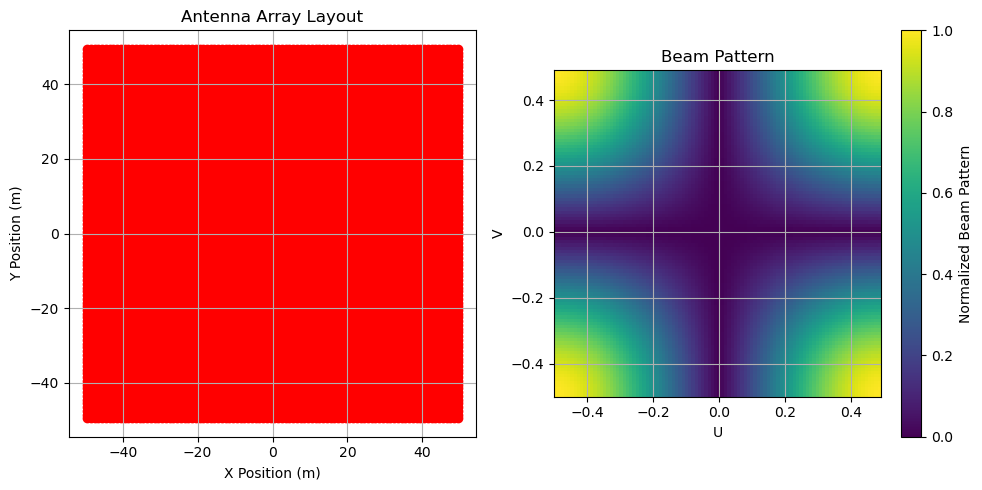

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the FFT Telescope parameters
frequency = 150e6  # observing frequency in Hz (150 MHz)
wavelength = 3e8 / frequency  # wavelength in meters
array_size = (100, 100)  # size of the antenna array (100x100)
grid_spacing = 1.0  # spacing between antennas in meters
array_side_length = grid_spacing * (array_size[0] - 1)

# Generate the positions of the antennas
x_positions = np.linspace(-array_side_length / 2, array_side_length / 2, array_size[0])
y_positions = np.linspace(-array_side_length / 2, array_side_length / 2, array_size[1])
x_grid, y_grid = np.meshgrid(x_positions, y_positions)

# Calculate the UV coverage
u = np.fft.fftfreq(array_size[0], d=grid_spacing)
v = np.fft.fftfreq(array_size[1], d=grid_spacing)
u_grid, v_grid = np.meshgrid(u, v)

# Compute the beam pattern
beam_pattern = np.sinc(u_grid * wavelength) * np.sinc(v_grid * wavelength)
beam_pattern = beam_pattern / np.max(beam_pattern)  # Normalize the beam pattern

# Plot the antenna array
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_grid, y_grid, c='red', marker='o')
plt.title('Antenna Array Layout')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.grid(True)

# Plot the beam pattern
plt.subplot(1, 2, 2)
plt.imshow(np.abs(beam_pattern), extent=(u.min(), u.max(), v.min(), v.max()), origin='lower')
plt.title('Beam Pattern')
plt.xlabel('U')
plt.ylabel('V')
plt.colorbar(label='Normalized Beam Pattern')
plt.grid(True)

plt.tight_layout()
plt.show()
